In [28]:
from tqdm import tqdm

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## New concepts introduced

- The action-value function $ q_\star (a) = E[R_t |A_t = a]$
- Exploration vs Exploitation
- Epsilon greedy action selection
- The multi armed bandit and learning

# 01 Reinforcement learning

## Basic expressions - Multi armed bandit problem

- Value fn

At any given time the value of taking a particular action is denoted:  
$ q_\star (a) = E[R_t |A_t = a]$

it is the expectation of the `R`ewards up to time `t` given the action at time `t` is `a`

If we knew the best actions we could simply chose to use the best machine at each interaction At.  
But we need to learn the value of these actions. The approximate value fn is denoted:  
$Q_t (a) \approx \frac{\sum\limits_{1}^{t}R_i|A_i=a)}{\sum\limits_{1}^{t}A_i=a} $

the average reward for all cases where we chose action a




- Explore vs Exploit (sample average approach of the Action Value method)

If we select the action with the highest estimate of rewards (sample average approach) we call this _Greedy selection_, i.e.

$ A_t = \underset{a}{\operatorname{argmax}} Q_t (a)$ 

However, if we always select the best action with our current knowledge we migh miss machine we havent tried enough or ones that have big rewards with low odds etc.

To truly find the best strategy it is important to explore the various machines and gain more knowledge around the expected returns for each machine so that we can exploit the best strategy with more confidence

- $\epsilon$ - greedy

The epsilon greedy strategy is the simplest form of balancing exploration and exploitation.  
With epsilon probability we will simply take a random action to see what happens, otherwise we will exploit the best known strategy:  

epsilon-greedy   
{  
1-$\epsilon$ : A_t= $ A_t = \underset{a}{\operatorname{argmax}} Q_t (a)$   
$\epsilon$ : random    
}    

## $\epsilon$ - greedy Multi Armed Bandits

In this example I create k bandits that each yield rewards distributed random normally with mean = k

In [4]:
from numpy import random

def bandit(a,b):
    def inner(a=a,b=b):
        return np.random.normal(loc=a,scale=b)
    return inner

Here we manually generate some bandits with normal distributions around different means with std of 1

In [5]:
# k=5
# means = [np.random.random_sample() for x in range(k)]
# bandits = [bandit(a) for a in means]

bandits = [bandit(0,1),bandit(-0.8,1),bandit(1.5,1),bandit(0.3,1),bandit(1.3,1),bandit(-1.3,1),bandit(-0.2,1),bandit(-1,1),bandit(1,1),bandit(-0.5,1)]
k=len(bandits)
k

10

Interacting with each machine produces rewards

In [6]:
tries=3

for i,bandit in enumerate(bandits):
    results=[]
    print(f'generating {tries} rewards for bandit {i}')
    for x in range(tries): 
        results.append(bandit())
    print(results)
        

generating 3 rewards for bandit 0
[0.5348175710607868, 2.0749024659298776, 0.21836850449332026]
generating 3 rewards for bandit 1
[-0.6516786578500706, -1.2114840458190081, -1.8505017165181565]
generating 3 rewards for bandit 2
[2.759629718481162, 2.279983097099257, 2.4173880426102645]
generating 3 rewards for bandit 3
[-1.9508063484207543, -1.0998451535267526, 1.2701771532468953]
generating 3 rewards for bandit 4
[1.2639080380355363, 0.7826296442495526, 1.2386194441717164]
generating 3 rewards for bandit 5
[-0.626770722525337, -0.028395322478124374, -2.1970477392861216]
generating 3 rewards for bandit 6
[0.7520099615195437, 0.4700761242547476, -0.5858396387329072]
generating 3 rewards for bandit 7
[-2.185783969168047, -1.6753880939634818, 0.2753565348302278]
generating 3 rewards for bandit 8
[0.9726089881488388, 0.46770163697310463, 1.4707034302262094]
generating 3 rewards for bandit 9
[0.35988884564749857, 1.4085168139826045, -1.6216804736517576]


Now for an $\epsilon$ - greedy solution

In [7]:
import random
time = range(1,500)
epsilon = 0.1

#initialize a dict for storing returns
R = {}
for y in range(k):
    R[y] = []
    
#initialize list for returns
R_all = []

#function to retun greedy action
def greedy_action(R):
    '''
    return the best action given the average historical returns
    '''
    
    ave_R = [np.mean(band_vals) for band_vals in R.values()]
    return np.argmax(ave_R)

#Store all returns for time played

for t in time:
    #Explore or exploit?
    
    coin = np.random.uniform(0,1)
    if coin > epsilon:
        exploit = True
    
    #Play and learn
    if exploit:
            #we must try all machines at least once to exploit
        if t < k:
            action = t - 1
        else:
            action = greedy_action(R) 
    else:
        action = np.random.choice(range(k))
        

        
        
    Rt = bandits[action]()
    R[action].append(Rt)
    R_all.append(Rt)
    


/mnt/c/Users/user/Documents/openai_gym_projects/gym/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/c/Users/user/Documents/openai_gym_projects/gym/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


and finally after playing we can evaluate the best action:

In [8]:
greedy_action(R)

2

In [9]:
ave_R = [np.mean(band_vals) for band_vals in R.values()]

In [10]:
ave_R

[-0.17270139751781557,
 -1.7935845444233451,
 1.4865532765471898,
 0.14957043642291115,
 0.38835651098732227,
 -2.438102085756599,
 -0.4887545824328992,
 -1.9505520754543544,
 1.1117291690440745,
 0.19498597108734872]

Visually:

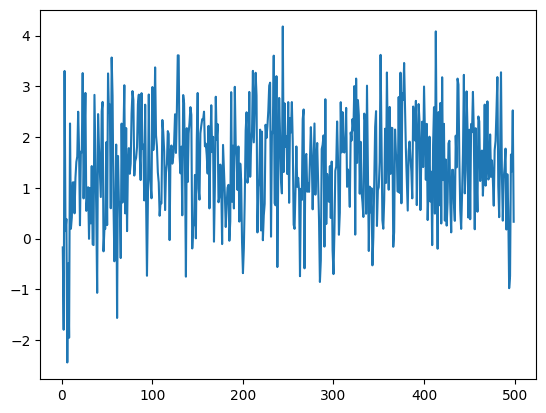

In [11]:
from matplotlib import pyplot as plt

plt.plot(time, R_all) 

Now we will simulate this learning experience by creating 2000 such games and showing the average learning experience

In [123]:
from tqdm import tqdm

def flip_coin():    
    return np.random.uniform(0,1)

def flip_n(n=100,epsilon=0.5):
    return(np.mean([flip_coin() > epsilon for i in range(n)]))

def run_sim(game_len=500,n_bandits=10,epsilon = 0.1,scale = 0.3):
    
    time = range(1,game_len+1)
    
    #function to retun greedy action
    def greedy_action(R):
        '''
        return the best action given the average historical returns
        '''

        ave_R = [np.mean(band_vals) for band_vals in R.values()]
        return np.argmax(ave_R)
    
    def generate_mean(a=-1,b=1):
        return (b-a) * np.random.random_sample() + a
    
    def bandit(a,b):
        def inner(a=a,b=b):
            return np.random.normal(loc=a,scale=b)
        return inner
    
    means = [generate_mean() for i in range(n_bandits)]
    scale = scale
    bandits = [bandit(means[i],scale) for i in range(n_bandits)]
    optimal_strat = np.argmax(means)
    
    R = {}
    for y in range(n_bandits):
        R[y] = []

    #initialize list for returns
    R_all = []
    
    #initialize list for testing if we used optimal strat
    is_optimal = []
    
    for t in time:
        
        #we must try all machines at least once to exploit
        if t <= n_bandits:
            action = t - 1
        #Explore or exploit?
        elif flip_coin() > epsilon:
            action = greedy_action(R) 
        else:
            action = np.random.choice(range(n_bandits))

        Rt = bandits[action]()
        R[action].append(Rt)
        R_all.append(Rt)
        is_optimal.append(action == optimal_strat)
        
    # plt.plot(time, R_all)
        
    return R, R_all, is_optimal
    
def bootstrap_sims(bootstraps=2000,game_len=500,n_bandits=10,epsilon = 0.1,scale = 0.3):
    time = range(1,game_len+1)
    sims = {i:[] for i in time}
    sim_optimal = {i:[] for i in time}
    
    for s in tqdm(range(bootstraps)):
        
        R, R_all, is_optimal = run_sim(game_len=game_len,n_bandits=n_bandits,epsilon=epsilon,scale=scale)

        for i,x in enumerate(R_all):
            sims[i+1].append(x)
            
        for i,x in enumerate(is_optimal):
            sim_optimal[i+1].append(x)
        
   
    R_average = [np.mean(x) for x in sims.values()] 
    optimal_average = [np.mean(x) for x in sim_optimal.values()] 
    results_df = pd.DataFrame(data={'time':time,'Reward_average':R_average,'optimal_average':optimal_average})
    results_df = results_df.set_index('time').stack().reset_index().rename(columns={'level_1':'var',0:'value'})
    sns.lineplot(data=results_df,x='time',y='value',hue='var').set(title='Average Rewards and %optimal action over time')
    
    return R_average, sims, results_df

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:36<00:00, 13.77it/s]


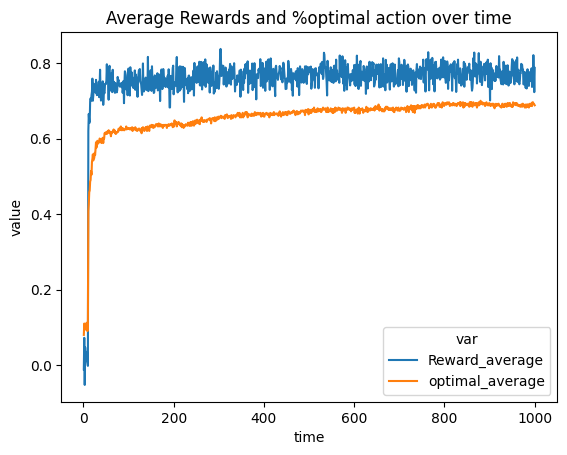

In [124]:
r, S, res_df = bootstrap_sims(bootstraps=500,game_len=1000,epsilon=0.01,scale=0.5)